Peran kernel: mendeteksi pola (tepi horizontal, vertikal, tekstur).

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Input Image (8x8):
 [[  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255.]]

Kernel Acak (3x3):
 [[ 1.7640524   0.4001572   0.978738  ]
 [ 2.2408931   1.867558   -0.9772779 ]
 [ 0.95008844 -0.1513572  -0.10321885]]

Feature Map (8x8 hasil konvolusi):
 [[   0.         0.         0.         0.         0.         0.
     0.         0.     ]
 [   0.         0.         0.         0.         0.         0.
     0.         0.     ]
 [   0.         0.         0.         0.         0.         0.
     0.         0.     ]
 [ 177.35567  177.35567  177.35567  177.35567  177.35567  177.35567
   177.35567  177.35567]
 [ 975.8048   975.8048   975.8048   975.8048   975.8048   975.8048
   975.8048   975.8048 ]
 [1777.256

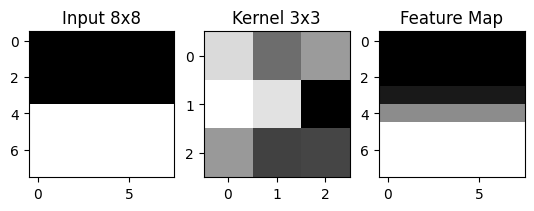

In [18]:
# 1. Kernel acak 3×3 pada gambar sederhana

img = np.zeros((8, 8), dtype=np.float32)
img[4:] = 255   # separuh bawah putih, separuh atas hitam
print("Input Image (8x8):\n", img)

# 2. Kernel acak 3x3
np.random.seed(0)
kernel = np.random.randn(3, 3).astype(np.float32)
print("\nKernel Acak (3x3):\n", kernel)

# 3. Konvolusi
feature_map = cv2.filter2D(img, -1, kernel)
print("\nFeature Map (8x8 hasil konvolusi):\n", feature_map)

# Visualisasi
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Input 8x8")

plt.subplot(1,3,2)
plt.imshow(kernel, cmap='gray')
plt.title("Kernel 3x3")

plt.subplot(1,3,3)
plt.imshow(feature_map, cmap='gray')
plt.title("Feature Map")

plt.show()


Input Image (12x12):
 [[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 255. 255. 255. 255.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 255. 255. 255. 255.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 255. 255. 255. 255.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 255. 255. 255. 255.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


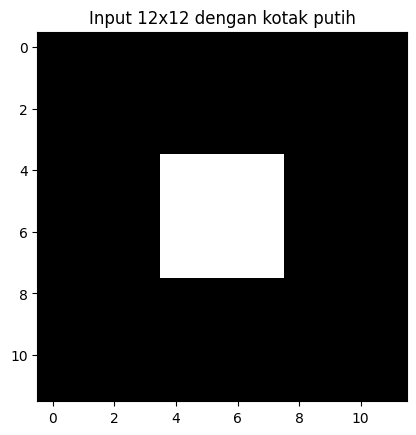

In [19]:
# Buat gambar 12x12 hitam
img = np.zeros((12,12), dtype=np.float32)

# Buat kotak putih 4x4 di tengah
img[4:8, 4:8] = 255

print("Input Image (12x12):\n", img)

# Visualisasi
plt.imshow(img, cmap='gray')
plt.title("Input 12x12 dengan kotak putih")
plt.show()



Kernel Sobel (3x3):
 [[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]

Feature Map (8x8 hasil konvolusi):
 [[    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
      0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
      0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
      0.     0.]
 [    0.     0.     0.   255.   765.  1020.  1020.   765.   255.     0.
      0.     0.]
 [    0.     0.     0.   255.   765.  1020.  1020.   765.   255.     0.
      0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
      0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
      0.     0.]
 [    0.     0.     0.  -255.  -765. -1020. -1020.  -765.  -255.     0.
      0.     0.]
 [    0.     0.     0.  -255.  -765. -1020. -1020.  -765.  -255.     0.
      0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
      0.     0.]
 [   

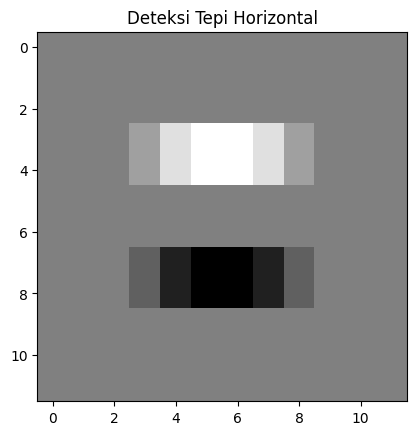

In [20]:
#2. Kernel horizontal edge detector
#Soal: Buat kernel untuk mendeteksi tepi horizontal.
# Kernel horizontal edge (Sobel-like)
kernel_h = np.array([[-1, -2, -1],[ 0, 0, 0],[ 1,2,1]], dtype=np.float32)
print("\nKernel Sobel (3x3):\n", kernel_h)
feature_map_h = cv2.filter2D(img, -1, kernel_h)
print("\nFeature Map (8x8 hasil konvolusi):\n", feature_map_h)
plt.imshow(feature_map_h, cmap='gray')
plt.title("Deteksi Tepi Horizontal")
plt.show()

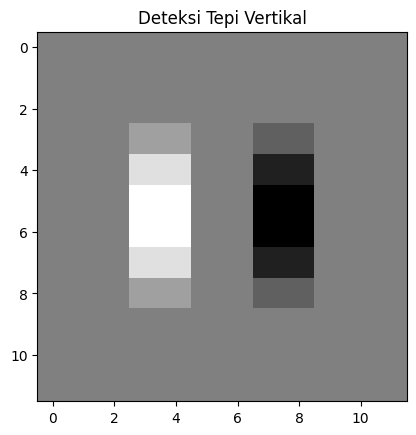

In [21]:
#3. Kernel vertical edge detector
#Soal: Buat kernel untuk mendeteksi tepi vertikal.
# Kernel vertical edge (Sobel-like)
kernel_v = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]], dtype=np.float32)
feature_map_v = cv2.filter2D(img, -1, kernel_v)
plt.imshow(feature_map_v, cmap='gray')
plt.title("Deteksi Tepi Vertikal")
plt.show()

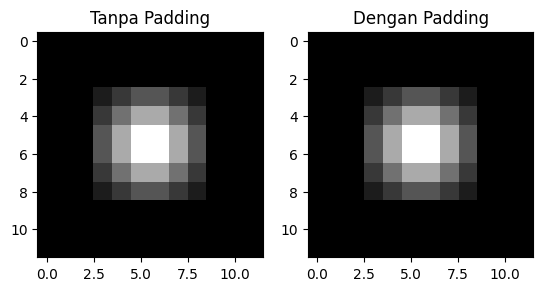

In [22]:
# Kernel blur sederhana
kernel_blur = np.ones((3,3), dtype=np.float32) / 9
# Tanpa padding (default)
fmap_no_pad = cv2.filter2D(img, -1, kernel_blur)
# Dengan padding (gunakan border replicate)
fmap_pad = cv2.filter2D(img, -1, kernel_blur,
borderType=cv2.BORDER_REPLICATE)
plt.subplot(1,2,1)
plt.imshow(fmap_no_pad, cmap='gray')
plt.title("Tanpa Padding")
plt.subplot(1,2,2)
plt.imshow(fmap_pad, cmap='gray')
plt.title("Dengan Padding")
plt.show()

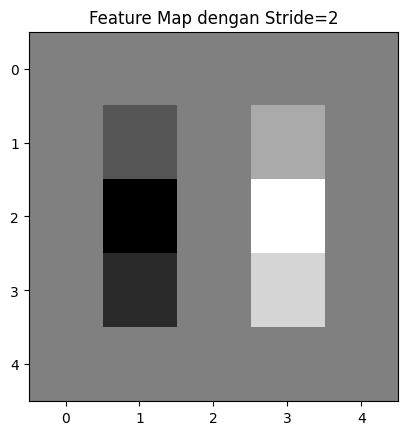

In [23]:
def conv_stride(img, kernel, stride=1, padding=0):
# Tambahkan padding
    if padding > 0:
        img = np.pad(img,((padding,padding),(padding,padding)), mode='constant')
    h, w = img.shape
    kh, kw = kernel.shape
    out_h = (h - kh)//stride + 1
    out_w = (w - kw)//stride + 1
    out = np.zeros((out_h, out_w))
    for i in range(0, h-kh+1, stride):
        for j in range(0, w-kw+1, stride):
            region = img[i:i+kh, j:j+kw]
            out[i//stride, j//stride] = np.sum(region * kernel)
    return out
kernel_simple = np.array([[1,0,-1],
[1,0,-1],
[1,0,-1]], dtype=np.float32)
fmap_stride2 = conv_stride(img, kernel_simple, stride=2)
plt.imshow(fmap_stride2, cmap='gray')
plt.title("Feature Map dengan Stride=2")
plt.show()

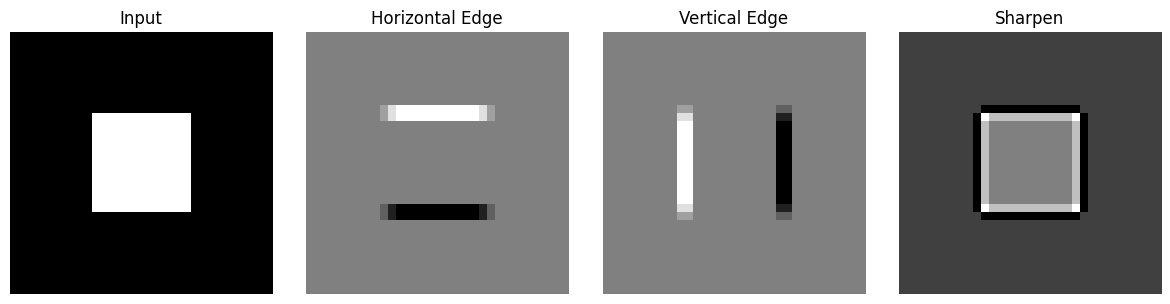

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Buat gambar sederhana: kotak putih di tengah
img = np.zeros((32,32), dtype=np.float32)
img[10:22, 10:22] = 255

# 2. Definisikan 3 kernel berbeda
kernel_h = np.array([[-1,-2,-1],
                     [ 0, 0, 0],
                     [ 1, 2, 1]], dtype=np.float32)   # horizontal edge

kernel_v = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]], dtype=np.float32)   # vertical edge

kernel_sharp = np.array([[0,-1,0],
                         [-1,5,-1],
                         [0,-1,0]], dtype=np.float32) # sharpen

kernels = [kernel_h, kernel_v, kernel_sharp]
titles = ["Horizontal Edge", "Vertical Edge", "Sharpen"]

# 3. Terapkan semua kernel ke gambar
feature_maps = [cv2.filter2D(img, -1, k) for k in kernels]

# 4. Plot input + 3 feature map
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].imshow(img, cmap='gray')
axes[0].set_title("Input")
axes[0].axis("off")

for i, fmap in enumerate(feature_maps):
    axes[i+1].imshow(fmap, cmap='gray')
    axes[i+1].set_title(titles[i])
    axes[i+1].axis("off")

plt.tight_layout()
plt.show()

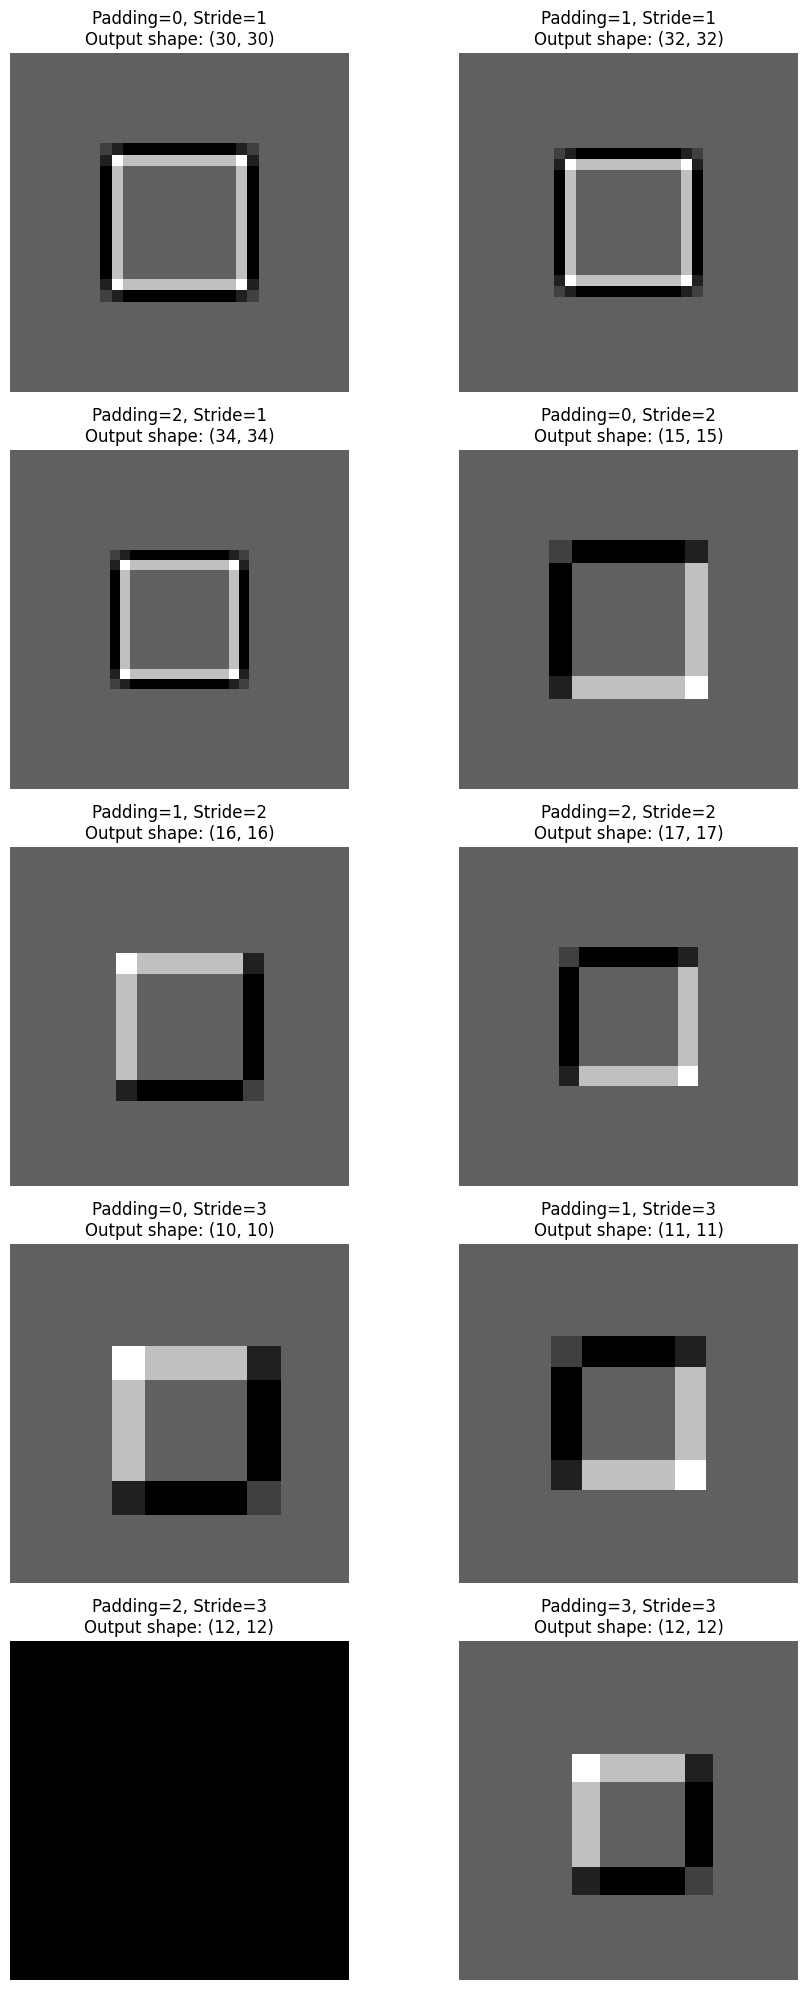

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
def conv_stride(img, kernel, stride=1, padding=0):
# Tambahkan padding
    if padding > 0:
        img = np.pad(img,((padding,padding),(padding,padding)), mode='constant')
    h, w = img.shape
    kh, kw = kernel.shape
    out_h = (h - kh)//stride + 1
    out_w = (w - kw)//stride + 1
    out = np.zeros((out_h, out_w))
    for i in range(0, h-kh+1, stride):
        for j in range(0, w-kw+1, stride):
            region = img[i:i+kh, j:j+kw]
            out[i//stride, j//stride] = np.sum(region * kernel)
    return out

# Gambar sederhana: kotak putih di tengah
img = np.zeros((32,32), dtype=np.float32)
img[10:22,10:22] = 255
# Kernel edge sederhana
kernel = np.array([[-1,-1,-1],[-1, 8,-1],[-1,-1,-1]], dtype=np.float32)
experiments = [
("Padding=0, Stride=1", 0, 1),
("Padding=1, Stride=1", 1, 1),
("Padding=2, Stride=1", 2, 1),
("Padding=0, Stride=2", 0, 2),
("Padding=1, Stride=2", 1, 2),
("Padding=2, Stride=2", 2, 2),
("Padding=0, Stride=3", 0, 3),
("Padding=1, Stride=3", 1, 3),
("Padding=2, Stride=3", 2, 3),
("Padding=3, Stride=3", 3, 3),
]
# Plot hasil
fig, axes = plt.subplots(5,2, figsize=(10,20))
for ax, (title, pad, stride) in zip(axes.ravel(),experiments):
    fmap = conv_stride(img, kernel, stride=stride,
padding=pad)
    ax.imshow(fmap, cmap='gray')
    ax.set_title(f"{title}\nOutput shape: {fmap.shape}")
    ax.axis("off")
plt.tight_layout()
plt.show()

Shape feature tensor: (32, 32, 3)


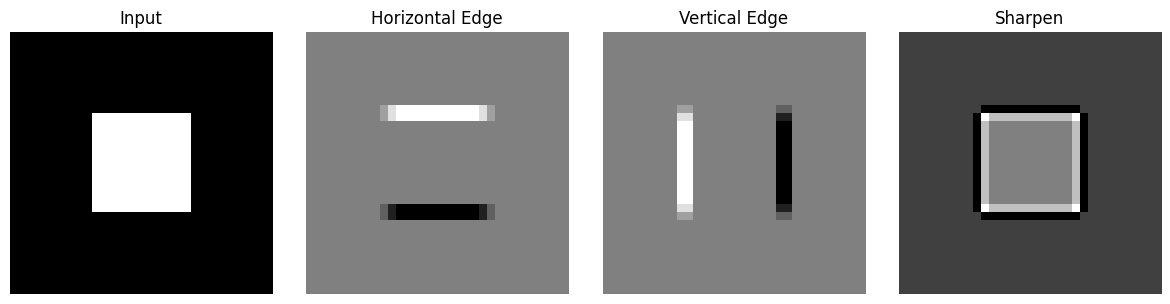

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Buat gambar sederhana: kotak putih di tengah
img = np.zeros((32,32), dtype=np.float32)
img[10:22, 10:22] = 255

# 2. Definisikan beberapa kernel berbeda
kernel_h = np.array([[-1,-2,-1],
                     [ 0, 0, 0],
                     [ 1, 2, 1]], dtype=np.float32)   # horizontal edge

kernel_v = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]], dtype=np.float32)   # vertical edge

kernel_sharp = np.array([[0,-1,0],
                         [-1,5,-1],
                         [0,-1,0]], dtype=np.float32) # sharpen

kernels = [kernel_h, kernel_v, kernel_sharp]
titles = ["Horizontal Edge", "Vertical Edge", "Sharpen"]

# 3. Terapkan semua kernel ke gambar
feature_maps = [cv2.filter2D(img, -1, k) for k in kernels]

# 4. Gabungkan semua feature map menjadi satu tensor (H, W, N_filters)
feature_tensor = np.stack(feature_maps, axis=-1)

print("Shape feature tensor:", feature_tensor.shape)  # (32, 32, 3)

# 5. Visualisasi input + semua feature map
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].imshow(img, cmap='gray')
axes[0].set_title("Input")
axes[0].axis("off")

for i, fmap in enumerate(feature_maps):
    axes[i+1].imshow(fmap, cmap='gray')
    axes[i+1].set_title(titles[i])
    axes[i+1].axis("off")

plt.tight_layout()
plt.show()

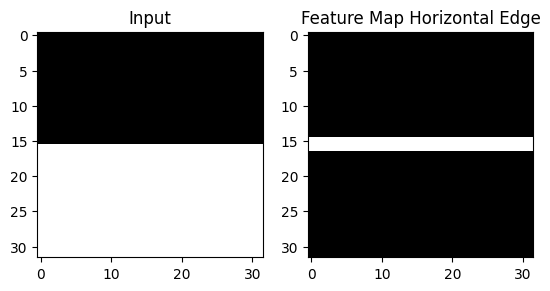

In [26]:
#1. Kernel Horizontal Edge
import cv2, numpy as np, matplotlib.pyplot as plt

# Gambar sederhana: separuh atas hitam, bawah putih
img = np.zeros((32,32), dtype=np.float32); img[16:] = 255

# Kernel horizontal edge
kernel_h = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)

fmap_h = cv2.filter2D(img, -1, kernel_h)

plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title("Input")
plt.subplot(1,2,2); plt.imshow(fmap_h, cmap='gray'); plt.title("Feature Map Horizontal Edge")
plt.show()

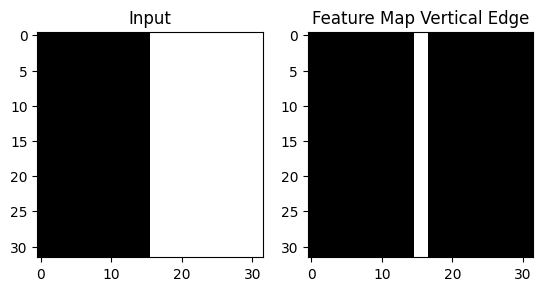

In [27]:
#2. Kernel Vertical Edge
img2 = np.zeros((32,32), dtype=np.float32); img2[:,16:] = 255

kernel_v = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)

fmap_v = cv2.filter2D(img2, -1, kernel_v)

plt.subplot(1,2,1); plt.imshow(img2, cmap='gray'); plt.title("Input")
plt.subplot(1,2,2); plt.imshow(fmap_v, cmap='gray'); plt.title("Feature Map Vertical Edge")
plt.show()

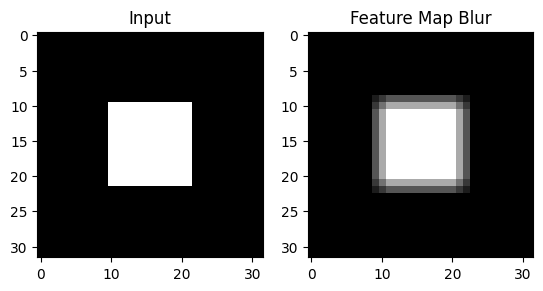

In [28]:
#3. Kernel Blur
img3 = np.zeros((32,32), dtype=np.float32); img3[10:22,10:22] = 255

kernel_blur = np.ones((3,3), dtype=np.float32)/9

fmap_blur = cv2.filter2D(img3, -1, kernel_blur)

plt.subplot(1,2,1); plt.imshow(img3, cmap='gray'); plt.title("Input")
plt.subplot(1,2,2); plt.imshow(fmap_blur, cmap='gray'); plt.title("Feature Map Blur")
plt.show()

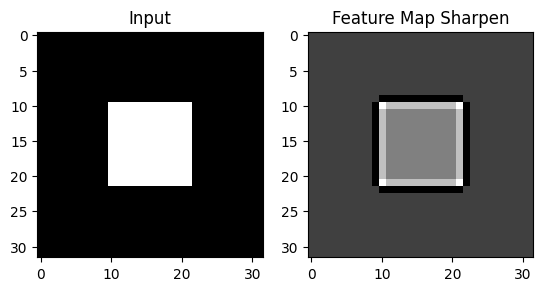

In [29]:
#4. Kernel Sharpen
img4 = np.zeros((32,32), dtype=np.float32); img4[10:22,10:22] = 255

kernel_sharp = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]], dtype=np.float32)

fmap_sharp = cv2.filter2D(img4, -1, kernel_sharp)

plt.subplot(1,2,1); plt.imshow(img4, cmap='gray'); plt.title("Input")
plt.subplot(1,2,2); plt.imshow(fmap_sharp, cmap='gray'); plt.title("Feature Map Sharpen")
plt.show()

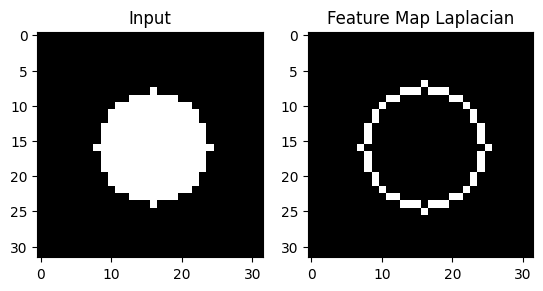

In [30]:
#5. Kernel Laplacian (Edge Detection)
img5 = np.zeros((32,32), dtype=np.uint8)
cv2.circle(img5, (16,16), 8, 255, -1)

kernel_lap = np.array([[0,1,0],[1,-4,1],[0,1,0]], dtype=np.float32)

fmap_lap = cv2.filter2D(img5, -1, kernel_lap)

plt.subplot(1,2,1); plt.imshow(img5, cmap='gray'); plt.title("Input")
plt.subplot(1,2,2); plt.imshow(fmap_lap, cmap='gray'); plt.title("Feature Map Laplacian")
plt.show()

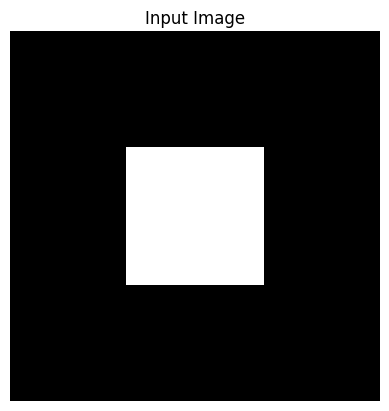

Feature map shape: (1, 32, 32, 2)


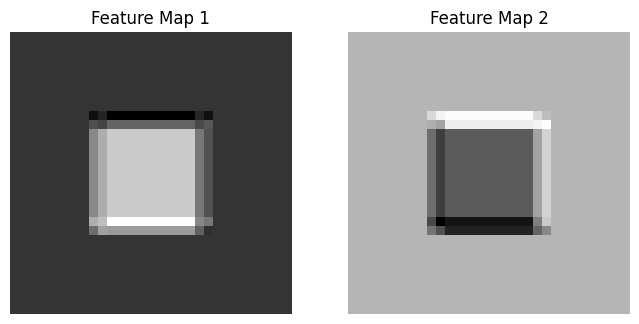

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 1. Buat gambar sederhana: kotak putih di tengah
img = np.zeros((32,32), dtype=np.float32)
img[10:22, 10:22] = 255.0   # kotak putih
plt.imshow(img, cmap="gray")
plt.title("Input Image")
plt.axis("off")
plt.show()

# 2. Ubah ke format TensorFlow (batch, height, width, channels)
img_tf = tf.constant(img.reshape(1,32,32,1))  # batch=1, channel=1

# 3. Definisikan layer Conv2D
conv_layer = tf.keras.layers.Conv2D(
    filters=2,              # jumlah filter
    kernel_size=(3,3),      # ukuran kernel
    strides=(1,1),          
    padding="same",         
    activation=None         # tanpa aktivasi dulu
)

# 4. Jalankan convolution
feature_maps = conv_layer(img_tf)

print("Feature map shape:", feature_maps.shape)  # (1, 32, 32, 2)

# 5. Visualisasi hasil feature map
fig, axes = plt.subplots(1, 2, figsize=(8,4))
for i in range(2):
    axes[i].imshow(feature_maps[0,:,:,i], cmap="gray")
    axes[i].set_title(f"Feature Map {i+1}")
    axes[i].axis("off")
plt.show()


Feature map shape: (1, 32, 32, 4)


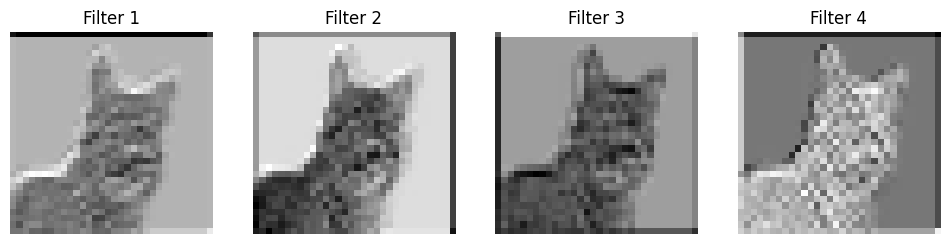

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Baca gambar kucing RGB dan resize ke 32x32
img = tf.io.read_file("cat.jpeg")
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize(img, [32, 32])
img = tf.image.convert_image_dtype(img, tf.float32)

# Tambahkan batch dimension → (1, 32, 32, 3)
img_batch = tf.expand_dims(img, axis=0)

# 2. Definisikan Conv2D layer
conv_layer = tf.keras.layers.Conv2D(
    filters=4,              # jumlah filter
    kernel_size=(3,3),      # ukuran kernel
    strides=(1,1),
    padding="same",
    activation=None
)

# 3. Jalankan convolution
feature_maps = conv_layer(img_batch)

print("Feature map shape:", feature_maps.shape)  # (1, 32, 32, 4)

# 4. Visualisasi hasil feature maps
fig, axes = plt.subplots(1, 4, figsize=(12,4))
for i in range(4):
    axes[i].imshow(feature_maps[0,:,:,i], cmap="gray")
    axes[i].set_title(f"Filter {i+1}")
    axes[i].axis("off")
plt.show()
